* 小波变换不仅可以看到信号中有哪些频率，还可以看到不同的频率成分在什么时间出现
## 定义
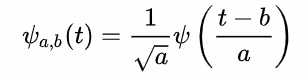

# 连续小波变换

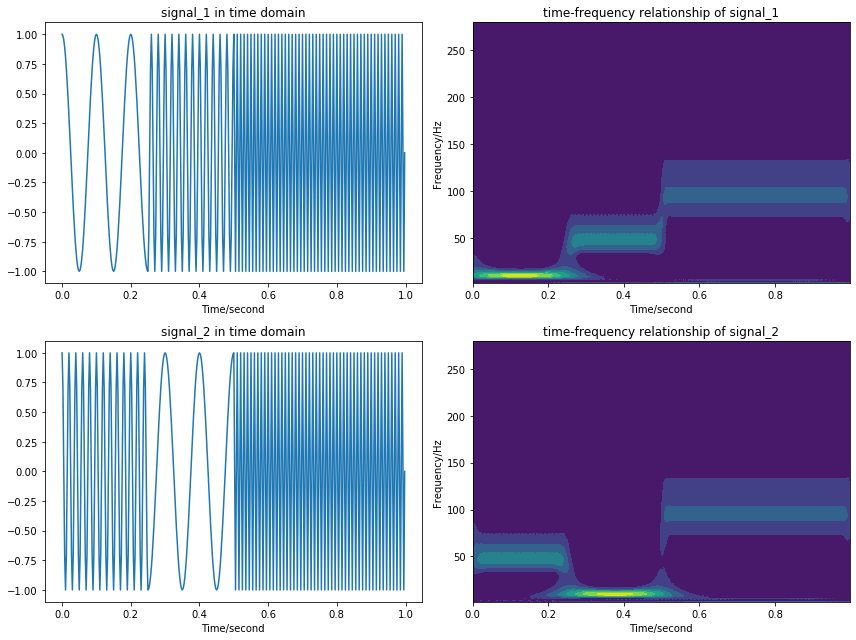

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

t = np.linspace(0, 1, 400, endpoint=False)
cond = [t<0.25, (t>=0.25)&(t<0.5), t>=0.5]
f1 = lambda t: np.cos(2*np.pi*10*t)
f2 = lambda t: np.cos(2*np.pi*50*t)
f3 = lambda t: np.cos(2*np.pi*100*t)

y1 = np.piecewise(t, cond, [f1, f2, f3])
y2 = np.piecewise(t, cond, [f2, f1, f3])

cwtmatr1, freqs1 = pywt.cwt(y1, np.arange(1, 200), 'cgau8', 1/400)
cwtmatr2, freqs2 = pywt.cwt(y2, np.arange(1, 200), 'cgau8', 1/400)

plt.figure(figsize=(12, 9))
plt.subplot(221)
plt.plot(t, y1)
plt.title('signal_1 in time domain')
plt.xlabel('Time/second')

plt.subplot(222)
plt.contourf(t, freqs1, abs(cwtmatr1))
plt.title('time-frequency relationship of signal_1')
plt.xlabel('Time/second')
plt.ylabel('Frequency/Hz')

plt.subplot(223)
plt.plot(t, y2)
plt.title('signal_2 in time domain')
plt.xlabel('Time/second')

plt.subplot(224)
plt.contourf(t, freqs2, abs(cwtmatr2))
plt.title('time-frequency relationship of signal_2')
plt.xlabel('Time/second')
plt.ylabel('Frequency/Hz')

plt.tight_layout()
plt.show()

# 离散小波变换

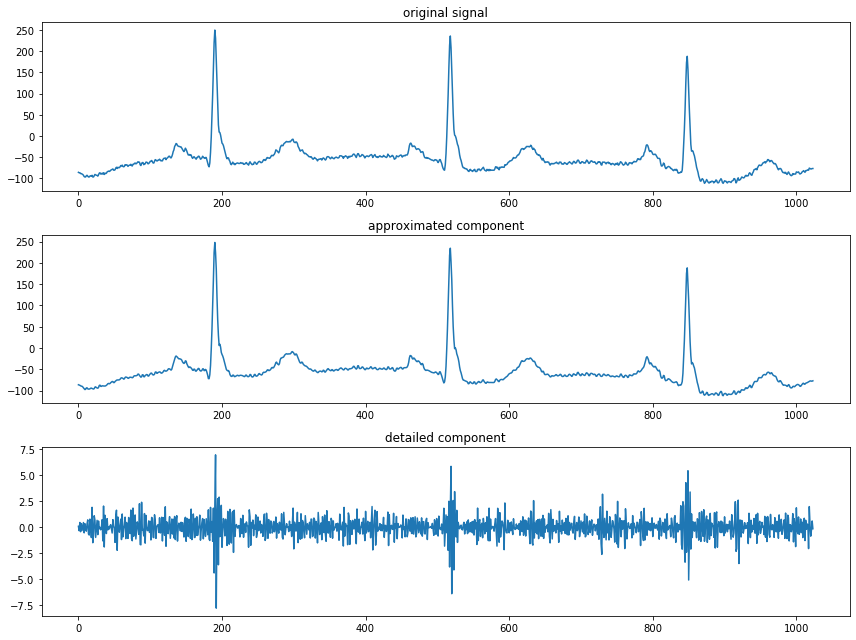

In [3]:
# 分解为一个低频的近似分量和一个高频的细节分量
import numpy as np
import matplotlib.pyplot as plt
import pywt

y = pywt.data.ecg()
x = range(len(y))

ca, cd = pywt.dwt(y, 'db4')
ya = pywt.idwt(ca, None, 'db4') # approximated component
yd = pywt.idwt(None, cd, 'db4') # detailed component

plt.figure(figsize=(12,9))
plt.subplot(311)
plt.plot(x, y)
plt.title('original signal')
plt.subplot(312)
plt.plot(x, ya)
plt.title('approximated component')
plt.subplot(313)
plt.plot(x, yd)
plt.title('detailed component')
plt.tight_layout()
plt.show()

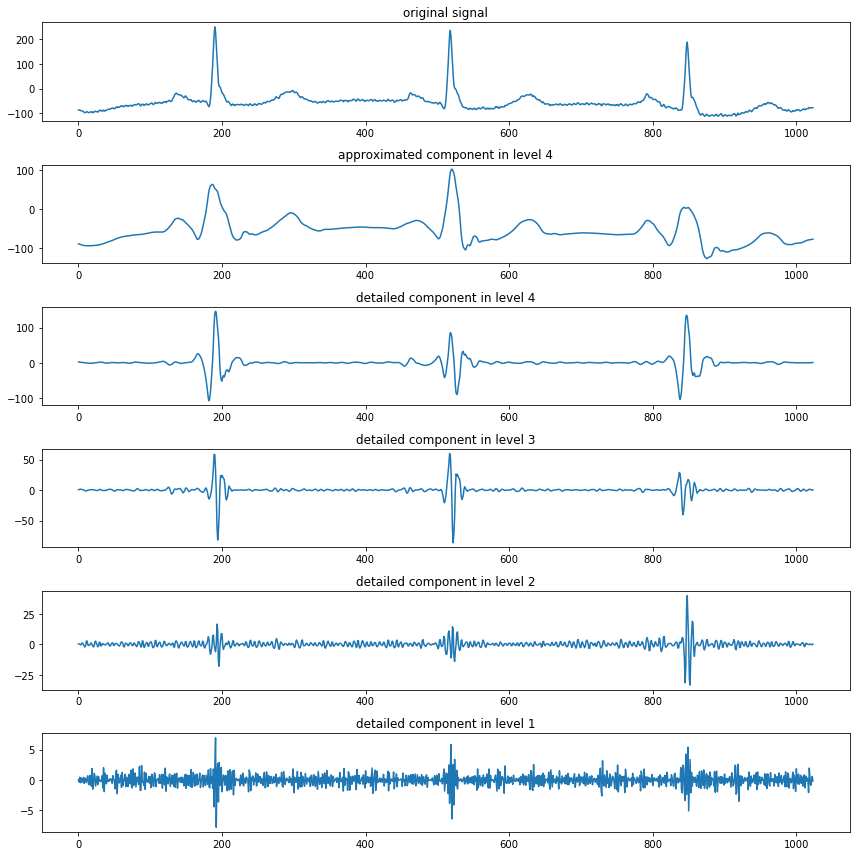

In [4]:
# 多阶小波分解：一个低频的近似分量和四个高频的细节分量
import numpy as np
import matplotlib.pyplot as plt
import pywt

y = pywt.data.ecg()
x = range(len(y))

coeffs = pywt.wavedec(y, 'db4', level=4) # 4阶小波分解

ya4 = pywt.waverec(np.multiply(coeffs, [1, 0, 0, 0, 0]).tolist(), 'db4')
yd4 = pywt.waverec(np.multiply(coeffs, [0, 1, 0, 0, 0]).tolist(), 'db4')
yd3 = pywt.waverec(np.multiply(coeffs, [0, 0, 1, 0, 0]).tolist(), 'db4')
yd2 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 1, 0]).tolist(), 'db4')
yd1 = pywt.waverec(np.multiply(coeffs, [0, 0, 0, 0, 1]).tolist(), 'db4')

plt.figure(figsize=(12, 12))
plt.subplot(611)
plt.plot(x, y)
plt.title('original signal')
plt.subplot(612)
plt.plot(x, ya4)
plt.title('approximated component in level 4')
plt.subplot(613)
plt.plot(x, yd4)
plt.title('detailed component in level 4')
plt.subplot(614)
plt.plot(x, yd3)
plt.title('detailed component in level 3')
plt.subplot(615)
plt.plot(x, yd2)
plt.title('detailed component in level 2')
plt.subplot(616)
plt.plot(x, yd1)
plt.title('detailed component in level 1')
plt.tight_layout()
plt.show()